In [ ]:
import os
!pip install pyspark
!pip install -U -q PyDrive
!pip install pyvis
!apt-get install graphviz graphviz-dev
!pip install pygraphviz


     |████████████████████████████████| 212.3MB 35kB/s 
     |████████████████████████████████| 204kB 47.5MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767604 sha256=00d08934320d803482e6f91c688bf9e0c259c36867843e5e0831473d97b1a84e
  Stored in directory: /root/.cache/pip/wheels/0b/90/c0/01de724414ef122bd05f056541fb6a0ecf47c7ca655f8b3c0f
Successfully built pyspark
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail1

In [ ]:
import pandas as pd
import gzip
import json
import networkx as nx
import matplotlib.pyplot as plt
import pyspark.sql.functions as sf
import pygraphviz as pgv

In [ ]:
#sc.stop()
#spark.stop()
from pyspark.sql import SparkSession
from pyspark import SparkConf, SparkContext

# create the context
conf = SparkConf().set("spark.ui.port", "4050")
sc = SparkContext(conf=conf)

# create the session
spark = SparkSession.builder.getOrCreate()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cur_path = "/content/drive/MyDrive/Colab Notebooks/BigData/Project/Data/"
os.chdir(cur_path)

In [ ]:
grocery_food_RDD = spark.read.json("/content/drive/MyDrive/Colab Notebooks/BigData/Project/Data/Grocery_and_Gourmet_Food.json.gz")
meta_data_RDD = spark.read.json("/content/drive/MyDrive/Colab Notebooks/BigData/Project/Data/meta_Grocery_and_Gourmet_Food.json.gz")

In [ ]:
meta_data_RDD.show(5, False)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------+----------+--------------+---------------------------------------------------------------------------------------------------------------+------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------+-----------------------------+---+--------------------------------------------------------------------------------------------

#Trader Joes

In [ ]:
meta_data_RDD.groupby('main_cat').agg(count('main_cat')).sort(col('count(main_cat)').desc()).show( )

+--------------------+---------------+
|            main_cat|count(main_cat)|
+--------------------+---------------+
|             Grocery|         261845|
|         Amazon Home|           8953|
|Health & Personal...|           8543|
|        Toys & Games|           1934|
|          All Beauty|           1604|
|                    |           1363|
|Industrial & Scie...|            981|
|     Office Products|            610|
|   Sports & Outdoors|            396|
|Cell Phones & Acc...|            167|
|        Pet Supplies|            133|
|Arts, Crafts & Se...|            132|
|                Baby|             95|
|<img src="https:/...|             87|
|Tools & Home Impr...|             66|
|           Computers|             39|
|<img src="https:/...|             30|
|     All Electronics|             20|
|Home Audio & Theater|             15|
|          Automotive|              7|
+--------------------+---------------+
only showing top 20 rows



In [ ]:
meta_data_grocery = meta_data_RDD.filter(col('main_cat') == 'Grocery')

In [ ]:
meta_data_grocery.groupby('main_cat').agg(count('main_cat')).show()

+--------+---------------+
|main_cat|count(main_cat)|
+--------+---------------+
| Grocery|         261845|
+--------+---------------+



In [ ]:
also_view_filtered = meta_data_RDD.select('also_view', 'asin', 'category', 'brand')
e_filtered = also_view_filtered.select(also_view_filtered.asin, sf.explode(also_view_filtered.category), also_view_filtered.also_view, also_view_filtered.brand)

In [ ]:
e_filtered.groupby('col').agg(count('col')).sort(col('count(col)').desc()).show(50)

+--------------------+----------+
|                 col|count(col)|
+--------------------+----------+
|Grocery & Gourmet...|    287051|
|           Beverages|     61720|
|    Cooking & Baking|     46134|
| Coffee, Tea & Cocoa|     45179|
|   Candy & Chocolate|     40668|
|         Snack Foods|     32262|
|                 Tea|     23507|
|Herbs, Spices & S...|     19217|
|              Coffee|     18658|
|Bottled Beverages...|     15398|
|Sauces, Gravies &...|     11014|
|Frosting, Icing &...|     10751|
|Canned, Jarred & ...|     10072|
|Food & Beverage G...|      9661|
|             Cookies|      8565|
|Jelly Beans & Gum...|      8327|
|Cake & Cupcake To...|      8324|
|     Breakfast Foods|      7724|
|        Tea Samplers|      7609|
|Mixed Spices & Se...|      7601|
|Candy & Chocolate...|      7515|
|Hard Candy & Loll...|      6922|
|Single Herbs & Sp...|      6884|
|Single-Serve Caps...|      6745|
|        Nuts & Seeds|      6564|
|              Sauces|      6150|
|Cooking Oils,

In [ ]:
e_filtered = e_filtered.withColumn('category', col('col'))

In [ ]:
e_filtered2 = e_filtered.select(e_filtered.asin, sf.explode(e_filtered.also_view), e_filtered.category, also_view_filtered.brand)

In [ ]:
e_filtered2.count()

7451534

In [ ]:
e_filtered2.head(5)


[Row(asin='0681727810', col='B0000D9MYM', category='Grocery & Gourmet Food', brand='Ariola Imports'),
 Row(asin='0681727810', col='B0000D9MYL', category='Grocery & Gourmet Food', brand='Ariola Imports'),
 Row(asin='0681727810', col='B00ADHIGBA', category='Grocery & Gourmet Food', brand='Ariola Imports'),
 Row(asin='0681727810', col='B00H9OX598', category='Grocery & Gourmet Food', brand='Ariola Imports'),
 Row(asin='0681727810', col='B001LM42GY', category='Grocery & Gourmet Food', brand='Ariola Imports')]

In [ ]:
to_graph = e_filtered2.filter(col('category') == 'Pickles')

In [ ]:
to_graph.show(20)

+----------+----------+--------+-----------+
|      asin|       col|category|      brand|
+----------+----------+--------+-----------+
|B0000D9MT1|B004NPLZMA| Pickles|Gundelsheim|
|B0000D9MT1|B0039BSG9E| Pickles|Gundelsheim|
|B0000D9MT1|B00DOOBDL4| Pickles|Gundelsheim|
|B0000D9MT1|B0010B8CE4| Pickles|Gundelsheim|
|B0000D9MT1|B000LRIKI6| Pickles|Gundelsheim|
|B0000D9MT1|B012MMY2X4| Pickles|Gundelsheim|
|B0000D9MT1|B004AHARXO| Pickles|Gundelsheim|
|B0000D9MT1|B00DOOBDPK| Pickles|Gundelsheim|
|B0000D9MT1|B0000D9MT2| Pickles|Gundelsheim|
|B0000D9MT1|B006O06X1A| Pickles|Gundelsheim|
|B0000D9MT1|B01KE585IO| Pickles|Gundelsheim|
|B0000D9MT1|B00XLO8PSG| Pickles|Gundelsheim|
|B0000D9MT1|B00O86Z3K4| Pickles|Gundelsheim|
|B0000D9MT1|B00XLO8IQ0| Pickles|Gundelsheim|
|B0000D9MT1|B0030D50ZE| Pickles|Gundelsheim|
|B0000D9MT1|B074HT3WCR| Pickles|Gundelsheim|
|B0000D9MT1|B008L0I3ZU| Pickles|Gundelsheim|
|B0000D9MT1|B00EZEBZWY| Pickles|Gundelsheim|
|B0000D9MT1|B00Q82DRX6| Pickles|Gundelsheim|
|B0000D9MT

In [ ]:
last_cat = udf(lambda x: x[-1])

In [ ]:
meta_data_RDD2 = meta_data_RDD.withColumn('category', last_cat('category'))

In [ ]:
meta_data_RDD2.show(10)

+--------------------+--------------------+----------+--------------+------------+------------------+--------------------+-------+--------------------+---+--------------------+-----------+------+--------------------+------------+-----+-----+--------------------+
|            also_buy|           also_view|      asin|         brand|    category|              date|         description|details|             feature|fit|               image|   main_cat| price|                rank|similar_item|tech1|tech2|               title|
+--------------------+--------------------+----------+--------------+------------+------------------+--------------------+-------+--------------------+---+--------------------+-----------+------+--------------------+------------+-----+-----+--------------------+
|                  []|[B0000D9MYM, B000...|0681727810|Ariola Imports|       Gouda|                  |[BEEMSTER GOUDA C...|   null|                  []|   |                  []|    Grocery|$41.91|165,181 in Groce

In [ ]:
meta_data_RDD_2 = meta_data_RDD2.filter(sf.size('also_view')>0)

In [ ]:
meta_data_RDD_2.groupby(col('brand')).agg(count('brand')).sort(col('count(brand)').desc()).show()

+--------------------+------------+
|               brand|count(brand)|
+--------------------+------------+
|                    |        1552|
|        Trader Joe's|         814|
|             Unknown|         688|
|           McCormick|         555|
|           Starbucks|         480|
|            Frontier|         474|
|      Bob's Red Mill|         419|
|              Nestle|         396|
|         Jelly Belly|         390|
|            igourmet|         376|
|              Roland|         348|
|                Goya|         342|
|           HERSHEY'S|         328|
|              Quaker|         313|
|The Nutty Fruit H...|         306|
|               Knorr|         304|
|Black Tie Mercantile|         302|
|             Cadbury|         300|
|       Betty Crocker|         289|
|              Lipton|         288|
+--------------------+------------+
only showing top 20 rows



In [ ]:
also_buy_filtered = meta_data_grocery.select('also_buy', 'asin', 'brand')
also_buy_filtered = also_buy_filtered.select(also_buy_filtered.asin, sf.explode(also_buy_filtered.also_buy), also_buy_filtered.brand)

In [ ]:
also_buy_filtered = also_buy_filtered.filter(col('brand') == "Trader Joe's")

In [ ]:
meta_data_RDD_join = meta_data_RDD.select('asin', 'brand')

In [ ]:
meta_data_RDD_join = meta_data_RDD_join.filter(col('brand') != '')

In [ ]:
meta_data_RDD_join = meta_data_RDD_join.withColumnRenamed('brand', 'dest_brand') \
.withColumnRenamed('asin', 'dest')

In [ ]:
also_buy_filtered = also_buy_filtered.withColumnRenamed('col', 'dest')
also_buy_filtered.show()

+----------+----------+------------+
|      asin|      dest|       brand|
+----------+----------+------------+
|B002B0QZLU|B014IACWTE|Trader Joe's|
|B002B0QZLU|B002EQTQZS|Trader Joe's|
|B002B0QZLU|B0009K52HW|Trader Joe's|
|B002B0QZLU|B00KS9HZE2|Trader Joe's|
|B002B0QZLU|B00VS68A5W|Trader Joe's|
|B002B0QZLU|B00KPWSUSW|Trader Joe's|
|B002B0QZLU|B002ER9KEY|Trader Joe's|
|B002B0QZLU|B013PUVRZ8|Trader Joe's|
|B002B0QZLU|1580089755|Trader Joe's|
|B002B0QZLU|B01EU9L5DC|Trader Joe's|
|B002B0QZLU|B074FG7RJQ|Trader Joe's|
|B002B0QZLU|B00K4VTV00|Trader Joe's|
|B002B0QZLU|B00KPSPG0Q|Trader Joe's|
|B003BQLKWW|B00ADFGJWU|Trader Joe's|
|B003BQLKWW|B00QFUVPQC|Trader Joe's|
|B003BQLKWW|B07JJP4WLR|Trader Joe's|
|B003BQLKWW|B00GCG9K66|Trader Joe's|
|B003BQLKWW|B0768JYK3G|Trader Joe's|
|B003BQLKWW|B0070R045W|Trader Joe's|
|B003BQLKWW|B00PRUHXMQ|Trader Joe's|
+----------+----------+------------+
only showing top 20 rows



In [ ]:
trader_joes = also_buy_filtered.join(meta_data_RDD_join, meta_data_RDD_join.dest == also_buy_filtered.dest).select(also_buy_filtered.asin, also_buy_filtered.dest, 'brand', 'dest_brand')

In [ ]:
trader_joes = trader_joes.withColumn('brand', when(trader_joes.brand == "Trader Joe's", "Trader_Joes").otherwise(trader_joes.brand))

In [ ]:
trader_joes.head(5)

[Row(asin='B002B0QZLU', dest='B014IACWTE', brand='Trader Joes', dest_brand='Kikkoman'),
 Row(asin='B002B0QZLU', dest='B002EQTQZS', brand='Trader Joes', dest_brand='Unknown'),
 Row(asin='B002B0QZLU', dest='B0009K52HW', brand='Trader Joes', dest_brand='Unknown'),
 Row(asin='B002B0QZLU', dest='B00KS9HZE2', brand='Trader Joes', dest_brand='Wan Ja Shan'),
 Row(asin='B002B0QZLU', dest='B00VS68A5W', brand='Trader Joes', dest_brand="Trader Ming's")]

In [ ]:
trader_joes = trader_joes.filter(col('asin').isNotNull())
trader_joes = trader_joes.filter(col('asin') != '')
trader_joes = trader_joes.filter(col('dest_brand').isNotNull())
trader_joes = trader_joes.filter(col('dest_brand') != '')
trader_joes = trader_joes.filter(col('brand').isNotNull())
trader_joes = trader_joes.filter(col('brand') != '')

In [ ]:
traders_2 = trader_joes.select('brand', 'dest_brand')

In [ ]:
edges = pd.DataFrame(traders_2.collect(), columns = ['brand', 'dest_brand'])

In [ ]:
edges['strlist'] = edges['brand'].astype(str) + " " + edges['dest_brand'].astype(str)

In [ ]:
G = nx.parse_edgelist(edges['strlist'])

In [ ]:
mapping = dict(zip(G, edges['dest_brand']))
B = nx.relabel_nodes(G, mapping)

In [ ]:
nx.write_gml(B,'trader_joes.gml')

#cheetos

In [ ]:
cheetos_RDD = meta_data_RDD.filter(meta_data_RDD['title'].rlike('Cheetos'))

In [ ]:
cheetos_RDD.show(20)

+--------------------+--------------------+----------+---------+--------------------+----+--------------------+--------------------+-------+---+--------------------+--------+------+--------------------+------------+-----+-----+--------------------+
|            also_buy|           also_view|      asin|    brand|            category|date|         description|             details|feature|fit|               image|main_cat| price|                rank|similar_item|tech1|tech2|               title|
+--------------------+--------------------+----------+---------+--------------------+----+--------------------+--------------------+-------+---+--------------------+--------+------+--------------------+------------+-----+-----+--------------------+
|                  []|[B007USCGYS, B018...|B000PIQF8S| Cheezies|[Grocery & Gourme...|    |[The great taste ...|{null, null, null...|     []|   |[https://images-n...| Grocery|      |594,112 in Grocer...|            |     |     |4-bags of Cheezie...|
|   

In [ ]:
#cheetos_exp = cheetos_RDD.select('also_buy', 'also_view', 'asin', 'category', 'brand', 'title')
e_filtered = cheetos_RDD.select('asin', sf.explode('also_buy'), 'also_view', 'brand', 'category', 'description', 'details', 'title')

In [ ]:
e_filtered = e_filtered.withColumnRenamed('col','also_buy')

In [ ]:
e_filtered = e_filtered.select('asin', sf.explode('also_view'), 'also_buy', 'brand', 'category', 'description', 'details', 'title')

In [ ]:
e_filtered = e_filtered.withColumnRenamed('col', 'also_view')

In [ ]:
e_filtered = e_filtered.filter(e_filtered.also_buy == e_filtered.also_view)

In [ ]:
e_filtered.count()

168

# IDK

In [ ]:
nx.write_gml(G,'pickle.gml')

In [ ]:
edges = pd.DataFrame(e_filtered.collect(), columns = ['asin', 'col', 'main_cat'])

In [ ]:
edges['strlist'] = edges['col'].astype(str) + " " + edges['asin'].astype(str)

In [ ]:
G = nx.parse_edgelist(edges['strlist'])

In [ ]:
N, K = G.order(), G.size()
avg_deg = float(K) / N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)

# Graphs

In [ ]:
#Plot Parameters
options = {
    "font_size": 36,
    "node_size": 15,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 0.10,
    "width": 0.5,
}

# Filtered RDD

generating edges on a filtered set of data with no also buys as that is what we use to generate they network.


In [ ]:
meta_data_RDD_Filtered = meta_data_RDD.filter(sf.size('also_view')>1)

In [ ]:
also_view_filtered = meta_data_RDD_Filtered.select('also_view', 'asin','main_cat')

In [ ]:
e_filtered = also_view_filtered.select(also_view_filtered.asin, sf.explode(also_view_filtered.also_view), also_view_filtered.main_cat)

In [ ]:
edges = pd.DataFrame(e_filtered.collect(), columns = ['asin', 'col', 'main_cat'])

In [ ]:
edges['strlist'] = edges['col'].astype(str) + " " + edges['asin'].astype(str)

In [ ]:
G = nx.parse_edgelist(edges['strlist'])

In [ ]:
N, K = G.order(), G.size()
avg_deg = float(K) / N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)

Nodes:  352368
Edges:  1732144
Average degree:  4.915724469872406


In [ ]:
largest_cc = nx.connected_components(G)

In [ ]:
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

In [ ]:
Gcc = max(nx.connected_components(G), key=len)
giantC = G.subgraph(Gcc)

In [ ]:
#A = nx.nx_agraph.to_agraph(giantC)

In [ ]:
#nx.cytoscape_data(G)
nx.write_gml(G,'g.gml')

# Complete Edge Network

In [ ]:
also_view = meta_data_RDD.select('also_buy', 'asin','main_cat')

In [ ]:
e = also_view.select(also_view.asin,explode(also_view.also_buy), also_view.main_cat)

In [ ]:
v = meta_data_RDD.select('asin', 'title','main_cat')

In [ ]:
e2 = e.sample(False, 0.01).collect()

In [ ]:
edges = pd.DataFrame(e.collect(), columns = ['asin', 'col', 'main_cat'])

In [ ]:
edges['strlist'] = edges['col'].astype(str) + " " + edges['asin'].astype(str)

In [ ]:
G = nx.parse_edgelist(edges['strlist'])

In [ ]:
# nx.draw(G, **options)

In [ ]:
N, K = G.order(), G.size()
avg_deg = float(K) / N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)

Nodes:  325475
Edges:  2459642
Average degree:  7.557084261464015


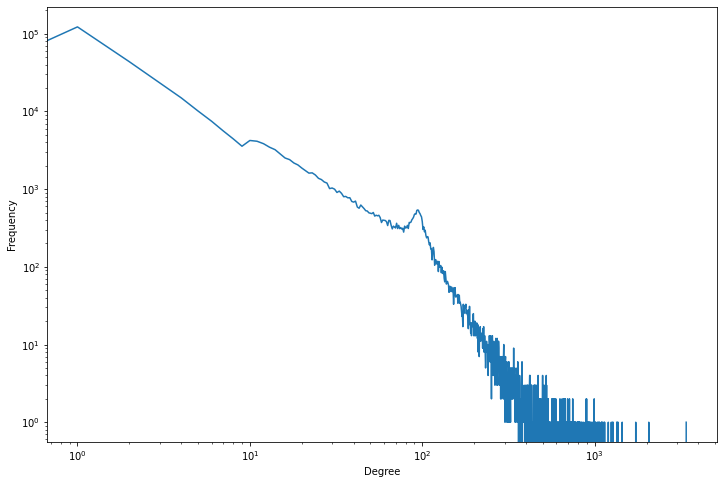

In [ ]:
degree_freq = nx.degree_histogram(G)

degrees = range(len(degree_freq))

plt.figure(figsize=(12, 8)) 
plt.loglog(degrees, degree_freq, ) 
y = np.log(data['o_value'], dtype='float64')
x = np.log(data['time_diff_day'], dtype='float64')

plt.xlabel('Degree')
plt.ylabel('Frequency')
#plt.xlim(0,100)

plt.savefig('degree_dist.png')

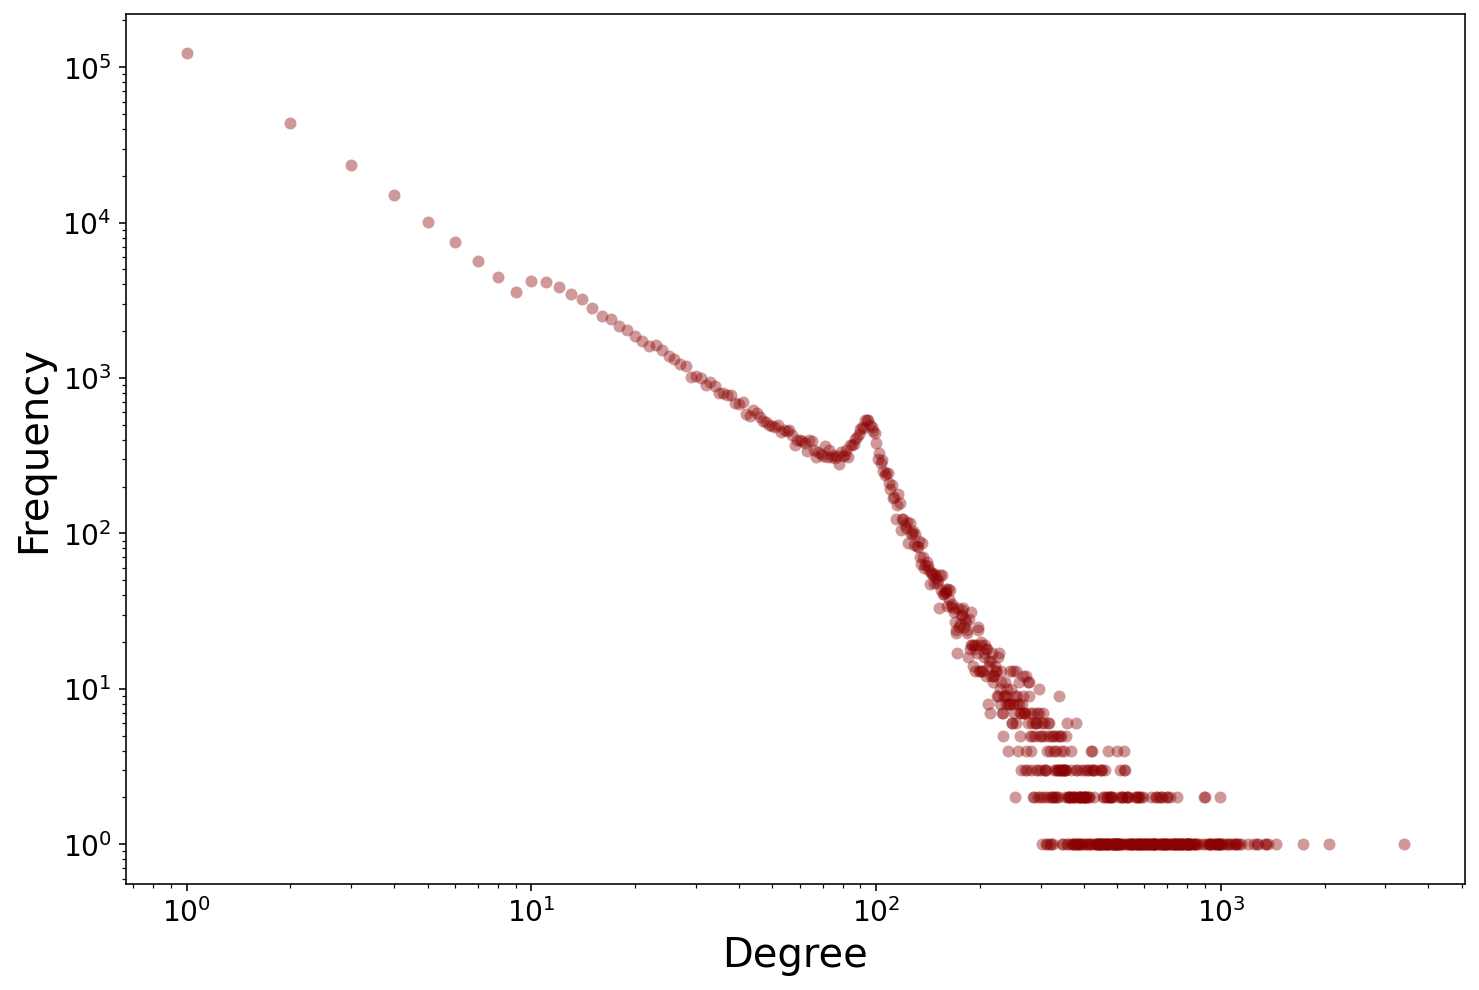

In [ ]:
plt.figure(figsize=(12, 8), dpi= 144) 
plt.gca()
plt.plot(degrees,degree_freq, 'o', c='darkred', alpha=0.4, markeredgecolor='none')
plt.yscale("log")
plt.xscale("log")
plt.xlabel('Degree', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.show()
#plt.savefig('degree_dist.png')

In [ ]:
|mapping = dict(zip(G, edges['main_cat']))
B = nx.relabel_nodes(G, mapping)

In [ ]:
nx.write_gml(B,'b.gml')

In [ ]:
v2 = pd.DataFrame(v.collect(), columns = ['asin', 'title','main_cat'])
mapping = dict(zip(G, v2['title']))
C = nx.relabel_nodes(G, mapping)

In [ ]:
nx.write_gml(C,'c.gml')

In [ ]:
# B.number_of_nodes()

In [ ]:
# from pyvis import network as net
# from IPython.core.display import display, HTML
# g4 = net.Network(height='400px', width='50%', notebook=True,heading='Zachary’s Karate Club graph')

In [ ]:
# g4.from_nx(G)

# g4.show_buttons(filter_=['physics'])
# g4.show('karate.html')
# display(HTML('karate.html'))
# g4.show('karate.html')

# EDA

In [ ]:
grocery_food_RDD.printSchema()

root
 |-- asin: string (nullable = true)
 |-- image: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- overall: double (nullable = true)
 |-- reviewText: string (nullable = true)
 |-- reviewTime: string (nullable = true)
 |-- reviewerID: string (nullable = true)
 |-- reviewerName: string (nullable = true)
 |-- style: struct (nullable = true)
 |    |-- Color:: string (nullable = true)
 |    |-- Design:: string (nullable = true)
 |    |-- Display Height:: string (nullable = true)
 |    |-- Edition:: string (nullable = true)
 |    |-- Flavor Name:: string (nullable = true)
 |    |-- Flavor:: string (nullable = true)
 |    |-- Format:: string (nullable = true)
 |    |-- Item Display Weight:: string (nullable = true)
 |    |-- Item Package Quantity:: string (nullable = true)
 |    |-- Material Type:: string (nullable = true)
 |    |-- Material:: string (nullable = true)
 |    |-- Number of Items:: string (nullable = true)
 |    |-- Package Quantity:: string (nulla

In [ ]:
meta_data_RDD.printSchema()

root
 |-- also_buy: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- also_view: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- asin: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- category: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- date: string (nullable = true)
 |-- description: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- details: struct (nullable = true)
 |    |-- 
    Item Weight: 
    : string (nullable = true)
 |    |-- 
    Product Dimensions: 
    : string (nullable = true)
 |    |--  Date first listed on Amazon:: string (nullable = true)
 |    |--  UNSPSC Code:: string (nullable = true)
 |    |-- ASIN:: string (nullable = true)
 |    |-- ASIN: : string (nullable = true)
 |    |-- Audio CD: string (nullable = true)
 |    |-- Batteries: string (nullable = true)
 |    |-- Discontinued by manufacturer:: string (nullable = true)
 |    |-- 

In [ ]:
meta_data_RDD(20)

[Row(also_buy=[], also_view=['B0000D9MYM', 'B0000D9MYL', 'B00ADHIGBA', 'B00H9OX598', 'B001LM42GY', 'B001LM5TDY'], asin='0681727810', brand='Ariola Imports', category=['Grocery & Gourmet Food', 'Dairy, Cheese & Eggs', 'Cheese', 'Gouda'], date='', description=['BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS', 'Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or health condition.'], details=None, feature=[], fit='', image=[], main_cat='Grocery', price='$41.91', rank='165,181 in Grocery & Gourmet Food (', similar_item='', tech1='', tech2='', title='Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs'),
 Row(also_buy=['B01898YHXK', 'B01BCM6LAC', 'B00Q4OL47O', 'B00Q4OL5QE', '0804189986', 'B00Q4OL2F8', '1101902663', 'B019PDEUU8', 'B01AC97ONO', 'B01LZIS4VX', 'B019QN2DN8', 'B019PDYP7Q', '1101902639', 'B00Q4OL0S2', 'B019PHEIVA', 'B019QNGPSW', 'B0041RGD0E', '0998089508', '0988775115', 'B0006Z7NNG', 'B00MU73UKS

In [ ]:
grocery_food_RDD.take(5)

[Row(asin='1888861614', image=None, overall=5.0, reviewText='Very pleased with my purchase. Looks exactly like the picture and will look great on my cake. It definitely will sparkle.', reviewTime='06 4, 2013', reviewerID='ALP49FBWT4I7V', reviewerName='Lori', style=None, summary='Love it', unixReviewTime=1370304000, verified=True, vote=None),
 Row(asin='1888861614', image=None, overall=4.0, reviewText='Very nicely crafted but too small. Am going to have to add some flowers or something to compensate for the size.', reviewTime='05 23, 2014', reviewerID='A1KPIZOCLB9FZ8', reviewerName='BK Shopper', style=None, summary='Nice but small', unixReviewTime=1400803200, verified=True, vote=None),
 Row(asin='1888861614', image=None, overall=4.0, reviewText="still very pretty and well made...i am super picky so don't listen to me...*whispers* but it does look like the number 5...", reviewTime='05 9, 2014', reviewerID='A2W0FA06IYAYQE', reviewerName='daninethequeen', style=None, summary='the "s" looks

In [ ]:
predictions_RDD = spark.read.json("/content/drive/MyDrive/Colab Notebooks/BigData/Project/Data/pred_2.json")
#pred2_RDD = spark.read.json("/content/drive/MyDrive/Colab Notebooks/BigData/Project/Data/pred_3.json")
#predictions_RDD = spark.read.json("/content/drive/MyDrive/Colab Notebooks/BigData/Project/Data/Old_Data/old_data.json")

In [ ]:
predictions_RDD.show(5)

+----------+--------------------+--------------------+-------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+
|      asin|            features|            filtered|overall|prediction|         probability|       rawPrediction|          reviewText|             summary|               words|
+----------+--------------------+--------------------+-------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+
|5463213682|{[1, 6, 12, 15, 1...|[purchased, didn'...|    2.0|       5.0|{1, [3.0325342920...|{1, [-6.887490685...|When purchased I ...|           Too sweet|[when, purchased,...|
|B00004W4VD|{[3, 4, 22, 29, 1...|[great, value., ,...|    5.0|       5.0|{1, [2.2242851393...|{1, [-6.886993186...|Great Value.  A v...|Great Value. A ve...|[great, value., ,...|
|B00005344V|{[1, 5, 7, 12, 12...|[drink, day, supp...|    5.0|       5.0|{1, [1.9135166408...|{1, [-6.886

In [ ]:
predictions_RDD.count()

15163

In [ ]:
import sklearn.metrics
import seaborn as sn
from pyspark.sql import *
from pyspark.sql.functions import *

In [ ]:
dataframe_new = pyspark.sql.DataFrame.sample(grocery_food_RDD, .01, seed=None)

In [ ]:
dataframe_new = dataframe_new.toPandas()

In [ ]:
plt.hist(dataframe_new['overall'])

In [ ]:
grocery_food_RDD.groupBy("overall").count().sort(desc("count")).show()

+-------+-------+
|overall|  count|
+-------+-------+
|    5.0|3573998|
|    4.0| 553201|
|    1.0| 405330|
|    3.0| 322134|
|    2.0| 219497|
+-------+-------+



In [ ]:
temp = grocery_food_RDD.groupBy("overall").count().sort(desc("count"))

In [ ]:
tmp = grocery_food_RDD.groupBy("overall").count().filter(col('overall')==2).collect()[0][1]

In [ ]:
tmp

219497

In [ ]:
temp.agg(sum('count')).show()

+----------+
|sum(count)|
+----------+
|     15163|
+----------+



In [ ]:
temp.withColumn('ratio', 1/(col('count')/tmp)).show()

+-------+-------+-------------------+
|overall|  count|              ratio|
+-------+-------+-------------------+
|    5.0|3573998|0.06141497560994718|
|    4.0| 553201|0.39677621696273147|
|    1.0| 405330| 0.5415266572915896|
|    3.0| 322134|  0.681384144486456|
|    2.0| 219497|                1.0|
+-------+-------+-------------------+



In [ ]:
predictions_pd = predictions_RDD.toPandas()

(array([ 1224.,     0.,   638.,     0.,     0.,   979.,     0.,  1644.,
            0., 10678.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

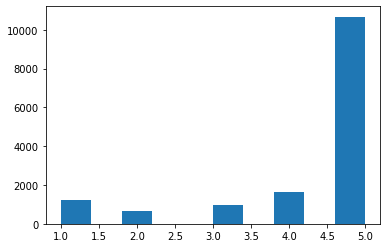

In [ ]:
plt.hist(predictions_pd['overall'])

In [ ]:
temp = predictions_pd.groupby('overall').count().asin.tolist()

In [ ]:
temp

[1224, 638, 979, 1644, 10678]

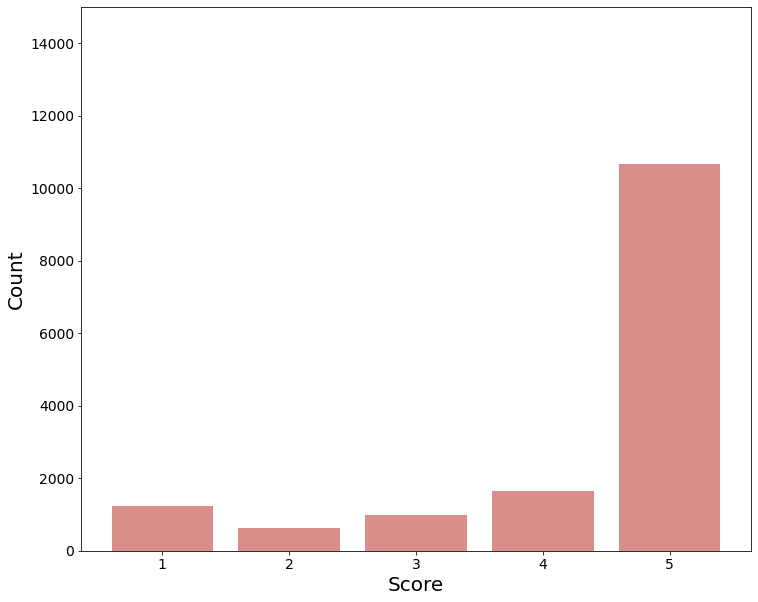

In [ ]:
plt.figure(figsize=(12,10), dpi= 72)
plt.bar(x = [1,2,3,4,5], height =temp, color = ['#db8d8a'])
plt.xlabel('Score', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.ylim(0,15000)
#plt.show()
plt.savefig('unbalanced_input_bar.png')

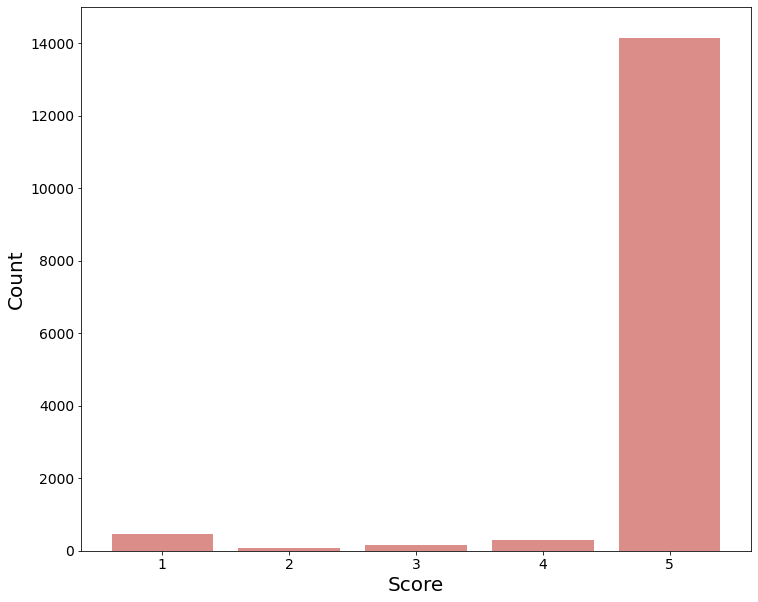

In [ ]:

plt.figure(figsize=(12,10), dpi= 72)
plt.bar(x = [1,2,3,4,5], height =predictions_pd.groupby('prediction').count().asin.tolist(), color = ['#db8d8a'])
plt.xlabel('Score', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.ylim(0,15000)
#plt.show()
plt.savefig('unbalanced_output_bar.png')

In [ ]:
predictions2_pd = predictions2_RDD.toPandas()

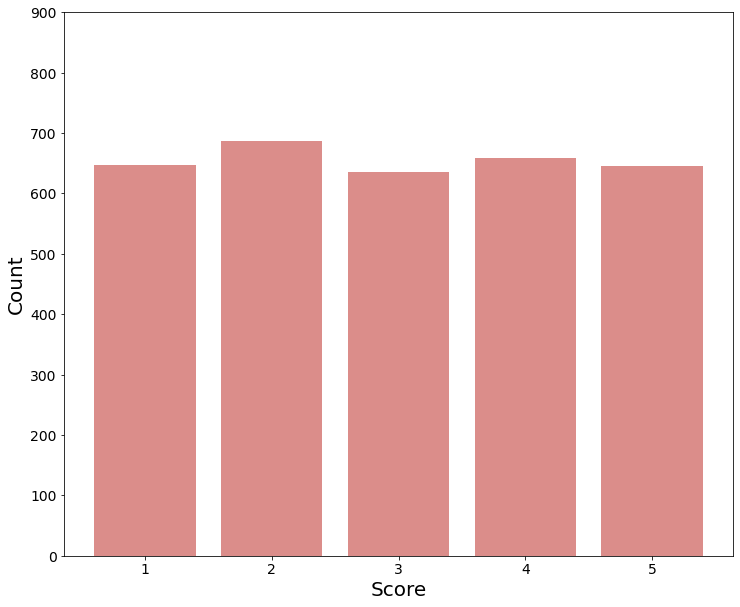

In [ ]:

plt.figure(figsize=(12,10), dpi= 72)
plt.bar(x = [1,2,3,4,5], height =predictions2_pd.groupby('overall').count().asin.tolist(), color = ['#db8d8a'])
plt.xlabel('Score', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.ylim(0,900)
#plt.show()
plt.savefig('balanced_input_bar.png')

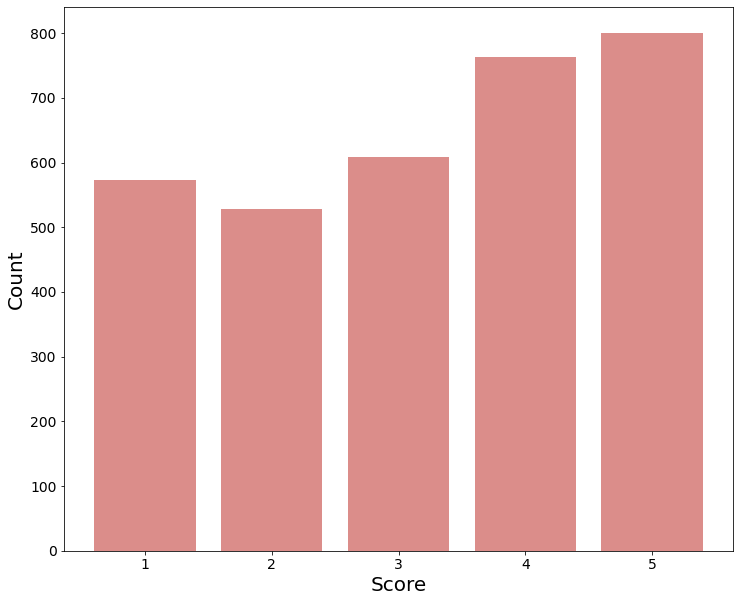

In [ ]:
plt.figure(figsize=(12,10), dpi= 72)
plt.bar(x = [1,2,3,4,5], height =predictions2_pd.groupby('prediction').count().asin.tolist(), color = ['#db8d8a'])
plt.xlabel('Score', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
#plt.show()
plt.savefig('balanced_output_bar.png')

In [ ]:
predictions_pd.head()

,asin,features,overall,prediction,probability,rawPrediction,reviewText,summary,words
0,B00008CQRK,"([0, 1, 3, 6, 15, 93, 94, 107, 366, 417, 801, ...",2.0,3.0,"(1, [0.00012514772560998384, 0.145882119788658...","(1, [-6.126355345004447, 0.9347039864558284, 0...",liked the first blend I bought better it was a...,Not to my taste.,"[liked, the, first, blend, i, bought, better, ..."
1,B0000CFH7B,"([19, 48, 106, 138, 216, 256], 262144, 0, [2.0...",3.0,1.0,"(1, [0.00012820837195829163, 0.206816305558256...","(1, [-6.1259940012476335, 1.259935418012825, 1...",Didn't work as well as we thought,Three Stars,"[didn't, work, as, well, as, we, thought]"
2,B0000CFMU7,"([0, 5, 8, 12, 17, 19, 20, 23, 28, 29, 42, 106...",5.0,4.0,"(1, [0.00011737910789532294, 0.118147333602533...","(1, [-6.128398313336153, 0.7858804661643188, 0...",These works very well as getting the colors ex...,Love them!,"[these, works, very, well, as, getting, the, c..."
3,B0000CNU0C,"([0, 1, 3, 4, 5, 6, 8, 9, 13, 16, 17, 18, 21, ...",3.0,4.0,"(1, [4.982315927932252e-05, 0.0373791895663247...","(1, [-6.131997115049992, 0.4883923630809708, 1...","I actually do like the flavor of this, but it ...",Full of MSG,"[i, actually, do, like, the, flavor, of, this,..."
4,B0000CNU1S,"([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...",2.0,4.0,"(1, [3.387596422174072e-05, 0.0125344059366113...","(1, [-6.174713342670979, -0.26118646847928706,...",NOT purchased on Amazon.\nThis&nbsp;<a data-ho...,"Chinese 5 spices NO, outstanding Licorice blen...","[not, purchased, on, amazon., this&nbsp;<a, da..."


In [ ]:
confmat = sklearn.metrics.confusion_matrix(predictions2_pd['prediction'], predictions2_pd['overall'])

In [ ]:
confusion_matrix = pd.crosstab(predictions_pd['prediction'], predictions_pd['overall'], rownames=['prediction'], colnames=['overall'])
print (confusion_matrix)

overall     1.0  2.0  3.0   4.0    5.0
prediction                            
1.0         295   61   57    21     30
2.0          27   20   15     6     11
3.0          22   26   54    26     30
4.0          24   32   62    84    105
5.0         856  499  791  1507  10502


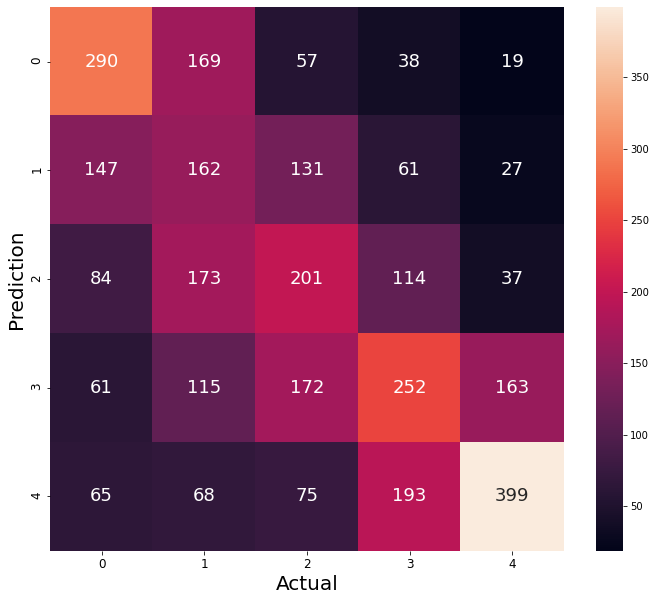

In [ ]:

plt.figure(figsize=(11.5,10), dpi= 72)
df_cm = pd.DataFrame(confmat)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 18}, fmt = 'd') # font size
plt.xlabel('Actual', fontsize=20)
plt.ylabel('Prediction', fontsize=20)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

plt.savefig('confusion_matrix.png')

In [ ]:
confusion_matrix[[2]].to_numpy().flatten().sum()

687

In [ ]:
confusion_matrix[[3]][:]

overall,3.0
prediction,
1.0,57
2.0,131
3.0,201
4.0,172
5.0,75


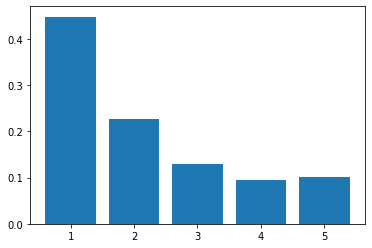

In [ ]:
plt.bar(x = confusion_matrix.index.to_list(), height = confusion_matrix[[1]].to_numpy().flatten()/confusion_matrix[[1]].to_numpy().flatten().sum())
plt.show()

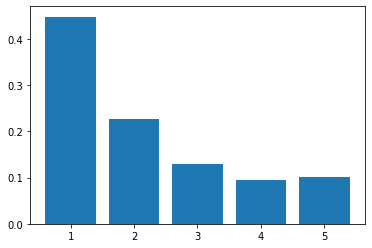

In [ ]:
plt.bar(x = confusion_matrix.index.to_list(), height = confusion_matrix[[1]].to_numpy().flatten()/confusion_matrix[[1]].to_numpy().flatten().sum())
plt.show()

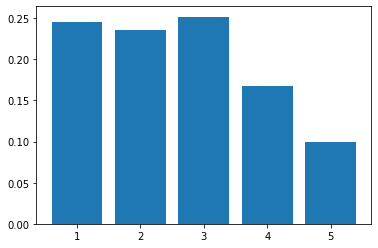

In [ ]:
plt.bar(x = confusion_matrix.index.to_list(), height = confusion_matrix[[2]].to_numpy().flatten()/confusion_matrix[[2]].to_numpy().flatten().sum())
plt.show()

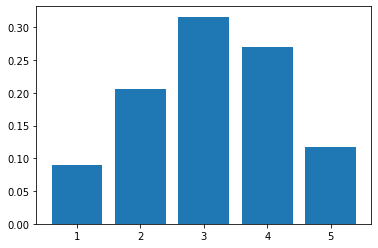

In [ ]:
plt.bar(x = confusion_matrix.index.to_list(), height = confusion_matrix[[3]].to_numpy().flatten()/confusion_matrix[[3]].to_numpy().flatten().sum())
plt.show()

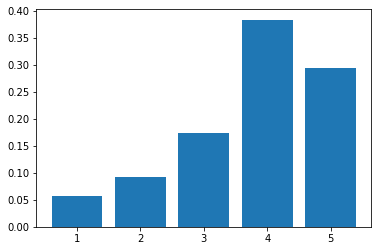

In [ ]:
plt.bar(x = confusion_matrix.index.to_list(), height = confusion_matrix[[4]].to_numpy().flatten()/confusion_matrix[[4]].to_numpy().flatten().sum())
plt.show()

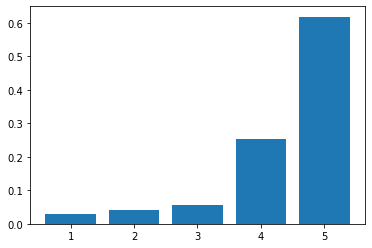

In [ ]:
plt.bar(x = confusion_matrix.index.to_list(), height = confusion_matrix[[5]].to_numpy().flatten()/confusion_matrix[[5]].to_numpy().flatten().sum())
plt.show()

In [ ]:
confmat

array([[290, 169,  57,  38,  19],
       [147, 162, 131,  61,  27],
       [ 84, 173, 201, 114,  37],
       [ 61, 115, 172, 252, 163],
       [ 65,  68,  75, 193, 399]])

In [ ]:
ge = predictions_pd['words'].values.tolist()

In [ ]:
y = [len(x) for x in predictions_pd['words'].values.tolist()]

In [ ]:
predictions_pd['length'] = y

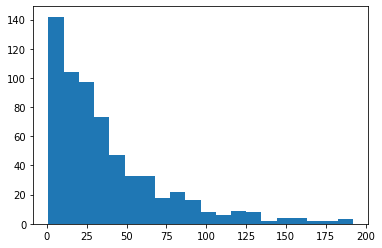

In [ ]:
plt.hist(predictions_pd[(predictions_pd['overall'] == 1) & (predictions_pd['length'] <200)]['length'], bins = 20)
plt.show()

In [ ]:
predictions_pd[predictions_pd[predictions_pd['length'] ==200] and predictions_pd[predictions_pd['overall'] == 1]]

In [ ]:
predictions_pd[(predictions_pd['overall'] == 5)]['length']

2        29
5       212
13        5
14        1
32       96
       ... 
3247     34
3257      6
3259    151
3260     25
3267     75
Name: length, Length: 645, dtype: int64

In [ ]:
predictions_pd[(predictions_pd['overall'] == 4)]['length'].describe()['mean']

38.96960486322188

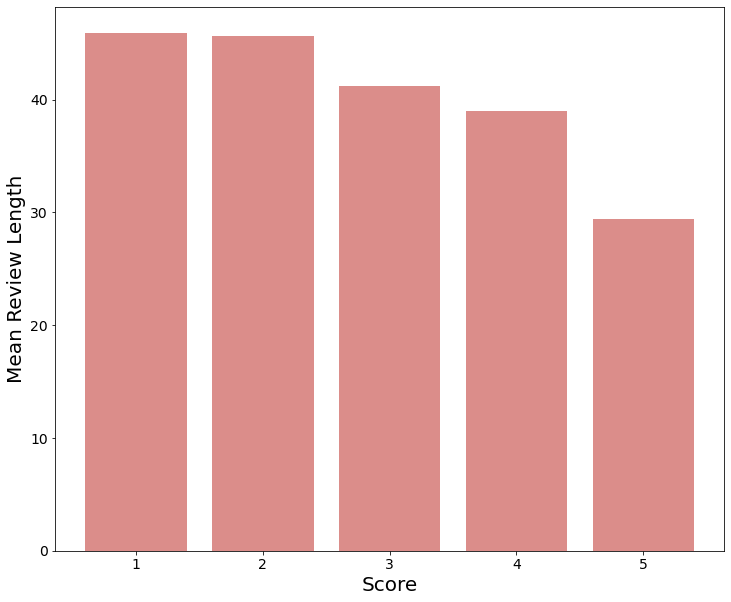

In [ ]:
plt.figure(figsize=(12,10), dpi= 72)
plt.bar(x = confusion_matrix.index.to_list(), height = predictions_pd.groupby('overall').agg('mean')['length'], color = ['#db8d8a'])
plt.xlabel('Score', fontsize=20)
plt.ylabel('Mean Review Length', fontsize=20)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)

plt.show()
#plt.savefig('length_barplot.png')

In [ ]:
pred_piv = predictions_pd.pivot(columns= 'overall',  values= 'length')

In [ ]:
import numpy as np

In [ ]:
x = np.array(pred_piv[1.0])
x = x[~np.isnan(x)]

In [ ]:
scores = [1.0,2.0,3.0,4.0,5.0]
out = []
for i in scores:
  x = np.array(pred_piv[i])
  x = x[~np.isnan(x)]
  out.append(x)



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


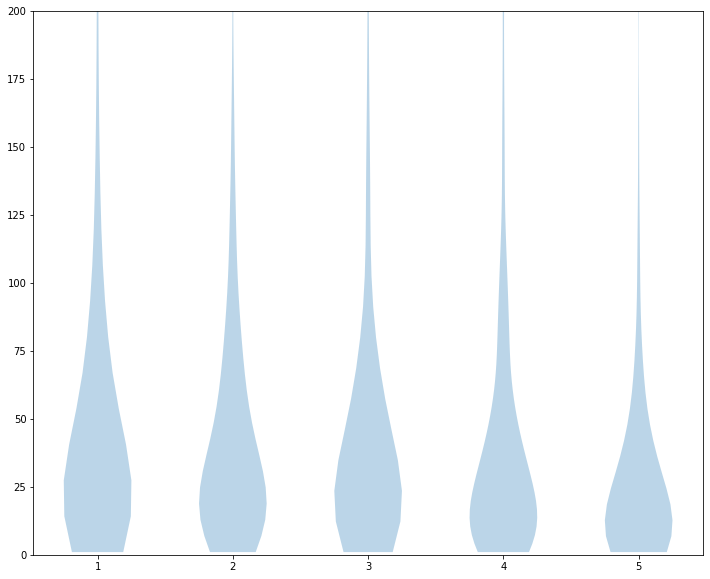

In [ ]:

plt.figure(figsize=(12,10), dpi= 72)
plt.violinplot(out,showextrema=False)
plt.ylim(0,200)

plt.show()

In [ ]:
from pyspark.sql.functions import udf

len_udf = udf(lambda x: len(x))

In [ ]:
metameta = meta_data_RDD.withColumn('num_view', len_udf('also_view'))\
.withColumn('num_buy', len_udf('also_buy'))\
.select('asin','also_buy', 'also_view','brand','num_view', 'num_buy')

In [ ]:
metameta.sort(metameta.num_buy.desc()).head(10)

[Row(asin='B0001EJ4CU', also_buy=['B00BUIKGU0', 'B01M3VWKHU', 'B006QYNLKU', 'B01ASW26TM', 'B07BBT37K9', 'B06XX51N55', 'B006R1UE52', 'B071CX48ZS', 'B00NW5OH40', 'B001FB6BA6', 'B004H4P5UU', 'B00786YL72', 'B00886AVOI', 'B01JI0XM70', 'B002HMN6SC', 'B004I5IC5I', 'B07DLFQQ79', 'B007B1V5ZK', 'B0001DMTJG', 'B005WXMPMQ', 'B01NASAQ63', 'B079WK6T2Y', 'B01LXBGEU6', 'B002ER9KEY', 'B0792L442G', 'B07F7MXPWD', 'B013HB0CC4', 'B003K3KOM8', 'B01BPPRRGS', 'B016EDAK0Q', 'B005J8DT0Q', 'B00A9OF6NS', 'B008K0Y3FK', 'B0001DMTM8', 'B0000CNU1B', 'B01LXQF0T1', 'B07BKXTMSM', 'B01BUL3W5M', 'B0002YB210', 'B000F08KCU', 'B01MF9B0OV', 'B071WX354Y', 'B01M6A03MU', 'B00TGDO9AE', 'B0009OA17Y', 'B0005XNHMK', 'B071WQTK9J', 'B01E5NIEKA', 'B00I9P242U', 'B0001DMTQO', 'B01LYMD0NW', 'B00EMM6XLW', 'B000A0ZEBA', 'B000EWMI5O', 'B000JMAVXA', 'B07B3KNBS1', 'B004NRLAVY', 'B0046H020G', 'B000RYPP5E', 'B00BVUBKJ8', 'B01MRTI49U', 'B00THPD0UG', 'B0035AL85I', 'B072P2G5PP', 'B00HEB9VV2', 'B00VFDK47K', 'B003Q3GGGU', 'B00E0MVI7I', 'B00AJRKPE0', 

# Only Wrong Answers

In [ ]:
predictions_RDD = predictions_RDD.withColumn('correct', \
                                             when(predictions_RDD.prediction == predictions_RDD.overall, lit(1))\
                                             .otherwise(lit(0)))

In [ ]:
predictions_RDD.filter('correct = 0').show()

+----------+--------------------+-------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+-------+
|      asin|            features|overall|prediction|         probability|       rawPrediction|          reviewText|             summary|               words|correct|
+----------+--------------------+-------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+-------+
|B00008CQRK|{[0, 1, 3, 6, 15,...|    2.0|       3.0|{1, [1.2514772560...|{1, [-6.126355345...|liked the first b...|    Not to my taste.|[liked, the, firs...|      0|
|B0000CFH7B|{[19, 48, 106, 13...|    3.0|       1.0|{1, [1.2820837195...|{1, [-6.125994001...|Didn't work as we...|         Three Stars|[didn't, work, as...|      0|
|B0000CFMU7|{[0, 5, 8, 12, 17...|    5.0|       4.0|{1, [1.1737910789...|{1, [-6.128398313...|These works very ...|          Love them!|[these, works, ve...|      0|
|B00

In [ ]:
predictions_pd = predictions_RDD.toPandas()

In [ ]:
ge = predictions_pd['words'].values.tolist()
y = [len(x) for x in predictions_pd['words'].values.tolist()]
predictions_pd['length'] = y

In [ ]:
wrong_answers = predictions_pd[predictions_pd.correct == 0]
right_answers = predictions_pd[predictions_pd.correct == 1]

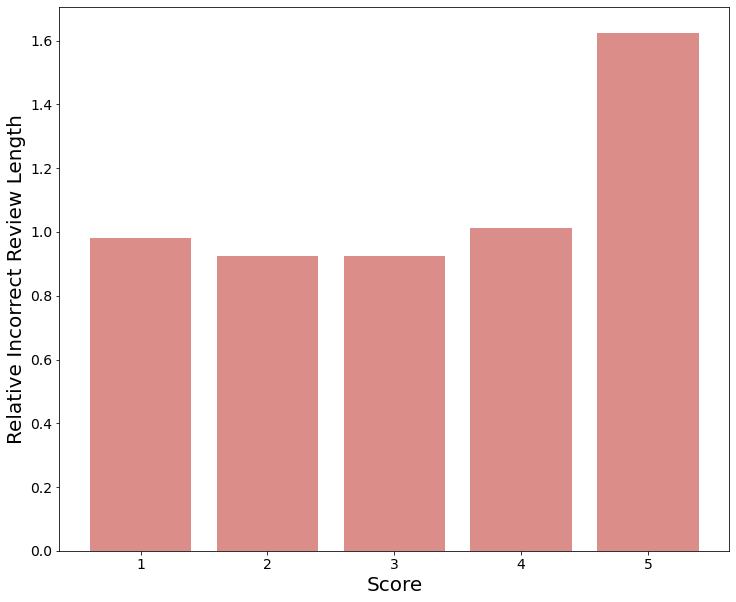

In [ ]:
plt.figure(figsize=(12,10), dpi= 72)
plt.bar(x = confusion_matrix.index.to_list(), height = wrong_answers.groupby('overall').agg('mean')['length']/predictions_pd.groupby('overall').agg('mean')['length'], color = ['#db8d8a'])
plt.xlabel('Score', fontsize=20)
plt.ylabel('Relative Incorrect Review Length', fontsize=20)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.show()
#plt.savefig('relative_length_incorrect.png')

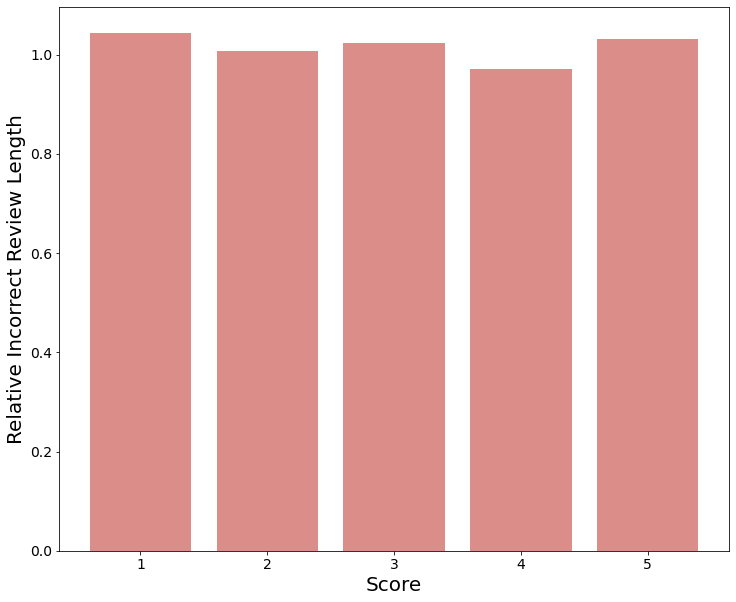

In [ ]:
plt.figure(figsize=(12,10), dpi= 72)
plt.bar(x = confusion_matrix.index.to_list(), height = wrong_answers.groupby('prediction').agg('mean')['length']/predictions_pd.groupby('prediction').agg('mean')['length'], color = ['#db8d8a'])
plt.xlabel('Score', fontsize=20)
plt.ylabel('Relative Incorrect Review Length', fontsize=20)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)

plt.savefig('relative_length_incorrect.png')

In [ ]:
pred_piv = predictions_pd.pivot(columns= 'overall',  values= 'length')
scores = [1.0,2.0,3.0,4.0,5.0]
out = []
for i in scores:
  x = np.array(pred_piv[i])
  x = x[~np.isnan(x)]
  out.append(x)



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


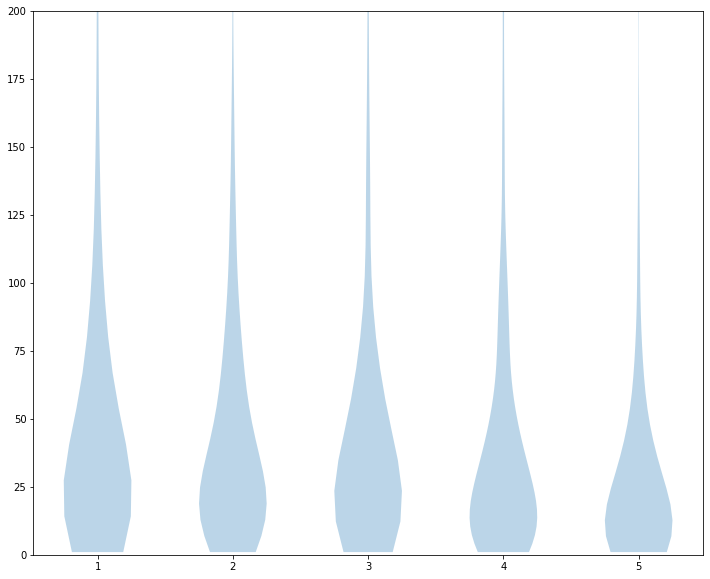

In [ ]:

plt.figure(figsize=(12,10), dpi= 72)
plt.violinplot(out,showextrema=False)
plt.ylim(0,200)

plt.show()